Importing Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

Imporing data

In [2]:
dataset = pd.read_csv("/content/Q3_Sikka data.csv")
dataset.head(5)

,Date,DAU,Installs,Uninstalls,Signups,Referrals
0,2022-10-01,24071,6630,6994,3511,962.0
1,2022-10-02,23548,6366,6669,3387,941.0
2,2022-10-03,24572,6936,6899,3654,940.0
3,2022-10-04,24212,6561,6766,3532,960.0
4,2022-10-05,23247,6059,6402,3315,923.0


In [23]:
dataset.describe()

,DAU,Installs,Uninstalls,Signups,Referrals
count,46.000000,46.000000,46.000000,46.000000,31.000000
mean,17788.586957,5064.978261,5494.347826,2550.891304,770.161290
std,4892.080923,1624.796773,1402.885078,991.987348,249.692891
min,12042.000000,3074.000000,3815.000000,1363.000000,384.000000
25%,13380.250000,3708.750000,4321.250000,1729.500000,543.500000
50%,15059.500000,4479.500000,4738.000000,2065.500000,801.000000
75%,23472.750000,6332.000000,6741.750000,3369.000000,961.000000
max,25156.000000,8937.000000,8215.000000,4974.000000,1193.000000


In [22]:
#create another dataset
df=dataset[:31]
print(df.head(5),df.tail(5))

         Date    DAU  Installs  Uninstalls  Signups  Referrals
0  2022-10-01  24071      6630        6994     3511      962.0
1  2022-10-02  23548      6366        6669     3387      941.0
2  2022-10-03  24572      6936        6899     3654      940.0
3  2022-10-04  24212      6561        6766     3532      960.0
4  2022-10-05  23247      6059        6402     3315      923.0           Date    DAU  Installs  Uninstalls  Signups  Referrals
26  2022-10-27  14896      3707        4563     1905      551.0
27  2022-10-28  14473      3735        4381     1799      555.0
28  2022-10-29  13390      4072        4695     1872      536.0
29  2022-10-30  13370      3543        4343     1942      573.0
30  2022-10-31  13236      3313        4057     1562      419.0


Correlation: 
Correlation helps to constitute the connection between the two variables.

<ipython-input-4-a788f337f292>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlations = df.corr()


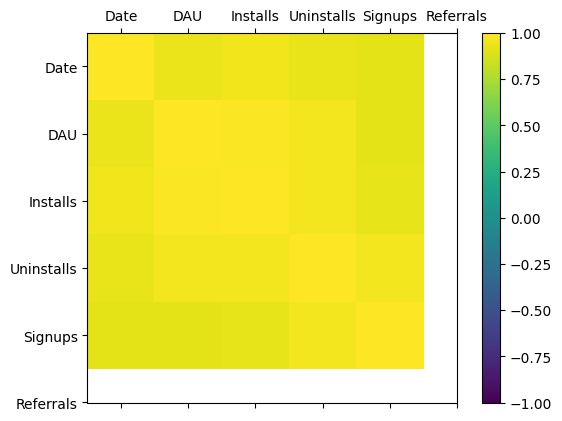

In [4]:
correlations = df.corr()
# plot correlation matrix
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(correlations, vmin=-1, vmax=1)
fig.colorbar(cax,)
ticks = np.arange(0,6,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(df.columns)
ax.set_yticklabels(df.columns)
plt.show()

In [5]:
X=df.iloc[:,1:-1].values
X

array([[24071,  6630,  6994,  3511],
       [23548,  6366,  6669,  3387],
       [24572,  6936,  6899,  3654],
       [24212,  6561,  6766,  3532],
       [23247,  6059,  6402,  3315],
       [24330,  6230,  6780,  3288],
       [24213,  6925,  7073,  3562],
       [25099,  7826,  7790,  4110],
       [24099,  8937,  8149,  4114],
       [25156,  8139,  8215,  4974],
       [24497,  7308,  7532,  4347],
       [24152,  8020,  7867,  4404],
       [24094,  7097,  7081,  4211],
       [21589,  6729,  7065,  3494],
       [20829,  5659,  6519,  2967],
       [22222,  5861,  6552,  3096],
       [20943,  5860,  6455,  2828],
       [20180,  6070,  6611,  2559],
       [19737,  5267,  6102,  2278],
       [20148,  5467,  6125,  2854],
       [17343,  3845,  4916,  1726],
       [16270,  3703,  4727,  1705],
       [15223,  3397,  4314,  1545],
       [13482,  3074,  3904,  1363],
       [14244,  3714,  4541,  1658],
       [14659,  3885,  4564,  1740],
       [14896,  3707,  4563,  1905],
 

In [6]:
Y=df.iloc[:,-1].values
Y

array([ 962.,  941.,  940.,  960.,  923.,  822.,  957.,  994., 1016.,
       1186., 1161., 1193.,  987.,  860.,  772., 1052.,  801.,  572.,
        606.,  700.,  512.,  530.,  484.,  384.,  435.,  491.,  551.,
        555.,  536.,  573.,  419.])

Importing Sklearn Libraries for multiple regression

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [8]:
#create training and test samples with 70/30 split ration between train and test 
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.30,random_state=0)

In [9]:
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

(21, 4) (21,)
(10, 4) (10,)


In [10]:
#Train the Linear Regression model on training dataset
lr = LinearRegression().fit(X_train, y_train)

In [11]:
lr

LinearRegression()

In [12]:
#the coefficients value for the input variables ( B1,B2,B3,B4)
lr.coef_

array([ 0.01929365, -0.02170285,  0.00976313,  0.17059049])

In [13]:
#The intercept value B0( the value of output when all input variables are zero )
lr.intercept_

-49.55749199964373

In [14]:
#print the results of the model on train dataset
print(" The accuracy of model on training dataset is {:.4f} ".format(lr.score(X_train,y_train)))

 The accuracy of model on training dataset is 0.9282 


In [15]:
#print the result of the model on test dataset
print(" The accuracy of model on test dataset is {:.4f} ".format(lr.score(X_test,y_test)))

 The accuracy of model on test dataset is 0.9350 


In [16]:
y_pred = lr.predict(X_test)
print(y_pred,y_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[ 964.6887115   505.1934808   885.95443683 1079.56750468  498.28399115
  490.33899768  476.10567643 1070.45307641  709.13728134  414.47509277] [ 940.  573.  860. 1161.  555.  491.  484. 1193.  572.  384.]
[[ 964.69  940.  ]
 [ 505.19  573.  ]
 [ 885.95  860.  ]
 [1079.57 1161.  ]
 [ 498.28  555.  ]
 [ 490.34  491.  ]
 [ 476.11  484.  ]
 [1070.45 1193.  ]
 [ 709.14  572.  ]
 [ 414.48  384.  ]]


In [17]:
import statsmodels.api as sm
from scipy import stats

In [18]:
#create training and test samples with 70/30 split ration between train and test 
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.30,random_state=0)
X_train=sm.add_constant(X_train)
ols_model = sm.OLS(y_train, X_train)
result = ols_model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.928
Model:                            OLS   Adj. R-squared:                  0.910
Method:                 Least Squares   F-statistic:                     51.72
Date:                Sun, 16 Apr 2023   Prob (F-statistic):           5.95e-09
Time:                        05:38:14   Log-Likelihood:                -115.82
No. Observations:                  21   AIC:                             241.6
Df Residuals:                      16   BIC:                             246.9
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -49.5575    165.768     -0.299      0.7

In [19]:
x_new = dataset.iloc[31:, 1:-1].values
x_new

array([[12816,  3763,  4149,  1806],
       [12812,  3087,  3868,  1550],
       [12042,  3176,  3815,  1410],
       [12595,  3172,  3878,  1629],
       [12361,  3390,  4021,  1578],
       [13166,  3441,  4071,  1656],
       [12565,  3468,  4011,  1556],
       [12988,  4468,  4143,  1808],
       [12992,  4491,  4638,  2017],
       [13377,  4261,  4480,  1997],
       [13826,  4274,  4512,  2047],
       [13464,  4660,  4856,  2066],
       [13415,  4416,  4749,  2147],
       [13873,  4097,  4305,  2065],
       [14459,  4890,  4593,  2707]])

In [20]:
y_new = lr.predict(x_new)
y_new

array([464.64, 432.82, 391.63, 440.36, 423.81, 452.03, 422.2 , 452.94,
       493.  , 500.47, 517.69, 508.93, 526.05, 523.49, 629.91])

In [21]:
y_new = lr.predict(x_new)
print(np.rint(y_new.reshape(len(y_new),1)))

[[465.]
 [433.]
 [392.]
 [440.]
 [424.]
 [452.]
 [422.]
 [453.]
 [493.]
 [500.]
 [518.]
 [509.]
 [526.]
 [523.]
 [630.]]
